In [1]:
%matplotlib inline
import numpy as np
from scipy.misc import factorial2
from scipy.special import factorial
import matplotlib.pylab as plt
from scipy.fftpack import dct, idct
from mpmath import *

In [48]:
# calculate real part
mp.dps = 100
mp.pretty = True
t = np.linspace(0,900,2**13+1)
result = [mp.nsum(lambda n: (-1)**n*x**(2*n)/mp.fac(2*n)/mp.sqrt(2*n),[1,mp.inf],method="s") for x in t]
result = np.array(result)+1

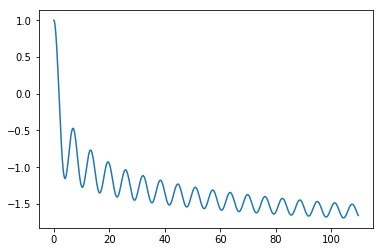

In [58]:
plt.plot(t[:1000],result[:1000])

In [54]:
np.savetxt("fIreal.csv",result,delimiter=',')

In [50]:
# calculate imaginary part
mp.dps = 100
mp.pretty = True
t = np.linspace(0,900,2**13+1)
result_i = [mp.nsum(lambda n: (-1)**(n-1)*x**(2*n-1)/mp.fac(2*n-1)/mp.sqrt(2*n-1),[1,mp.inf],method="s") for x in t]
result_i = np.array(result_i)

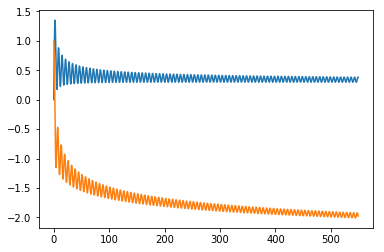

In [100]:
limit = 5000
plt.plot(t[:limit],result_i[:limit])
plt.plot(t[:limit],result[:limit])

In [55]:
np.savetxt("fIimag.csv",result_i,delimiter=',')

In [70]:
result_i[8000:].mean()

0.3267263165912302268549667545481805630733762972314236754673134134057701232086912106717717789392149717

In [72]:
print(np.pi/.326726)

9.615373902259977


16384


(0, 0.2)

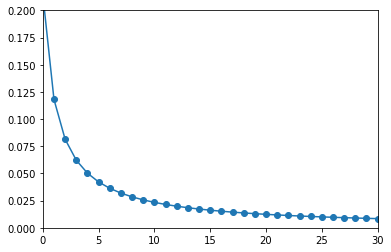

In [99]:
N = 2
# need to find the proper way of doing an fft
cf_fft = np.fft.irfft(1+np.sqrt(np.pi/2)*N*(result-1)+1j*np.sqrt(np.pi/2)*N*result_i)
print(cf_fft.size)
plt.plot(np.abs(cf_fft[1:]),"o-")
plt.xlim((0,30))
plt.ylim((0,0.2))
#plt.ylim((-.2,.2))